In [23]:
%cd C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor

# imports
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import src.utils.standard_plots as sp

C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor


In [24]:
# settings
MODEL_FILE = 'data/processed/models/ASP_RFR_model_3.pkl'
FULL_DATA_FILE = 'data/intermediate/datasets/EASE2_N3.125km_v1.1/ASP_full.parquet'
TRAINING_DATA_FILE = 'data/intermediate/datasets/EASE2_N3.125km_v1.1/ASP_train.parquet'
TEST_FILE_NOVEMBER = 'data/intermediate/datasets/EASE2_N3.125km_v1.1/ASP_test_2020-11-01_2020-12-01.parquet'
TEST_FILE_APRIL = 'data/intermediate/datasets/EASE2_N3.125km_v1.1/ASP_test_2022-04-01_2022-05-01.parquet'
MODEL_PRIMARY_IDS = ['C2I']
MODEL_SECONDARY_IDS = ['2020-2021', '2021-2022']

# Load data

In [25]:
model = pickle.load(open(MODEL_FILE, 'rb'))

full_df = pd.read_parquet(FULL_DATA_FILE)
train_df = pd.read_parquet(TRAINING_DATA_FILE)
nov_test_df = pd.read_parquet(TEST_FILE_NOVEMBER)
apr_test_df = pd.read_parquet(TEST_FILE_APRIL)

# Evaluate model performance on different sets

Training Set - RMSE: 0.0521, MAE: 0.0400


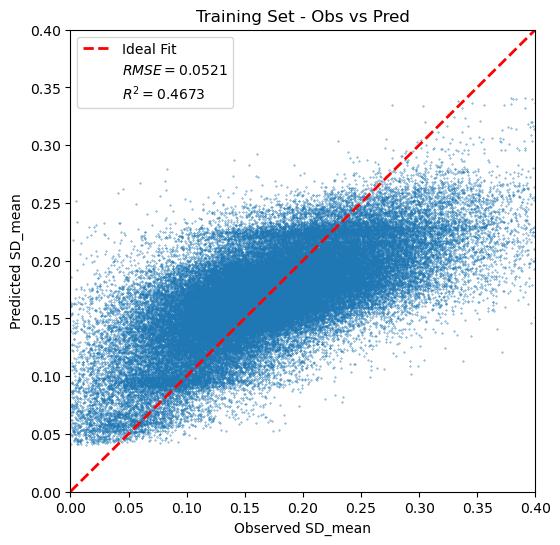

November test Set - RMSE: 0.0649, MAE: 0.0495


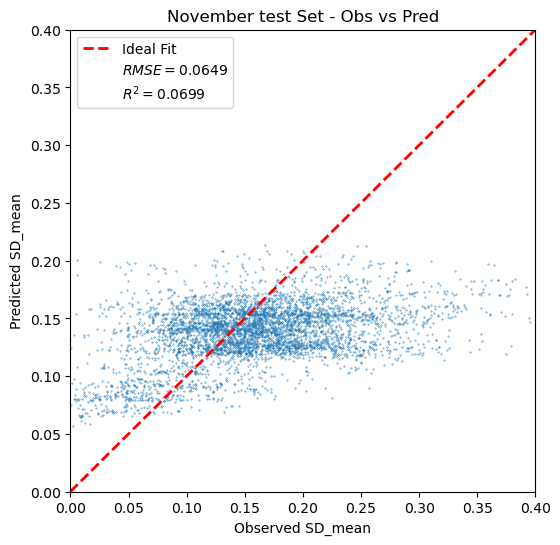

April test Set - RMSE: 0.0762, MAE: 0.0579


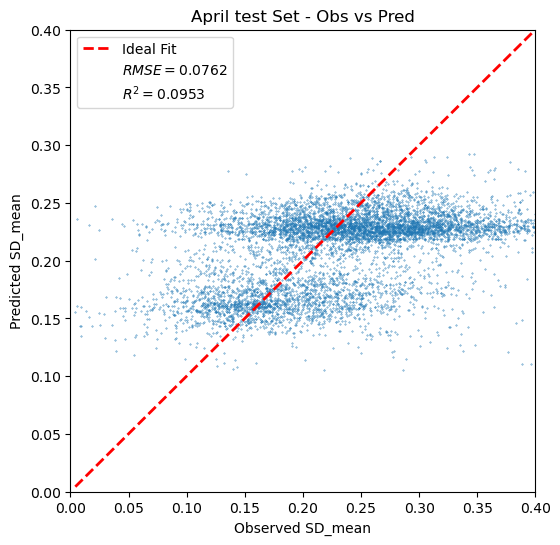

In [26]:
c_train_df = train_df[
    (train_df['primary_id'].isin(MODEL_PRIMARY_IDS)) &
    (train_df['secondary_id'].isin(MODEL_SECONDARY_IDS))
]
c_nov_test_df = nov_test_df[
    (nov_test_df['primary_id'].isin(MODEL_PRIMARY_IDS)) &
    (nov_test_df['secondary_id'].isin(MODEL_SECONDARY_IDS))
]
c_apr_test_df = apr_test_df[
    (apr_test_df['primary_id'].isin(MODEL_PRIMARY_IDS)) &
    (apr_test_df['secondary_id'].isin(MODEL_SECONDARY_IDS))
]

#c_test_df = c_test_df[c_test_df['SD_mean'] <= 0.25]

for df, name in zip([c_train_df, c_nov_test_df, c_apr_test_df],
                    ['Training Set', 'November test Set', 'April test Set']):
    X = df
    y_true = df['SD_mean'].values
    y_pred = model.predict(X)

    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    mae = np.mean(np.abs(y_true - y_pred))

    print(f'{name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}')

    fig = plt.figure(figsize=(6,6))
    sp.obs_vs_pred_scatter(fig, (1,1,1), y_true, y_pred, data_range=(0,0.4), s=0.1)
    plt.title(f'{name} - Obs vs Pred')
    plt.xlabel('Observed SD_mean')
    plt.ylabel('Predicted SD_mean')
    plt.show()


April test Set - RMSE: 0.0719, MAE: 0.0546


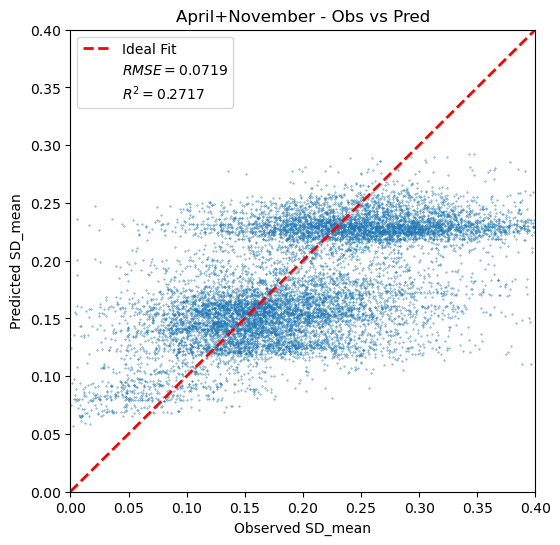

In [27]:
df = pd.concat([nov_test_df, apr_test_df], ignore_index=True)
X = df
y_true = df['SD_mean'].values
y_pred = model.predict(X)

rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
mae = np.mean(np.abs(y_true - y_pred))

print(f'{name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}')

fig = plt.figure(figsize=(6,6))
sp.obs_vs_pred_scatter(fig, (1,1,1), y_true, y_pred, data_range=(0,0.4), s=0.1)
plt.title('April+November - Obs vs Pred')
plt.xlabel('Observed SD_mean')
plt.ylabel('Predicted SD_mean')
plt.show()